# <B> NETFLIX : DATA EXPLORATION AND VISUALIZATION</b>

![](https://i.pinimg.com/564x/c9/5d/f8/c95df81f997c712a71a30794bc9a9b8f.jpg)

Problem Statement Adderessed : 
* Genre analysis and genre dependence of rating.
* Country dependency of the release rate
* Maturity rating Analysis.
* Content Release Rate ( Monthwise Release Rate)
* Duration ANalysis
* Imdb rating Genrewise
* Imdb rating Typewise
* Yearwise Quality Analysis
* Imdb rating on duration
* Rating dependence o directors.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:

df_raw = pd.read_csv("netflix.csv")
df_raw.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## Summary of the DataSet

In [3]:
df_raw.shape

(8807, 12)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## No. of Null Values

In [5]:
df_raw.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

 So columns containing null values are,
 * director
 * cast
 * country
 * date_added
 * rating
 * duration


In [6]:
df_raw['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

So, the dataset contains two types of products. Movies and Tv Shows.

# <B>Genre Analysis

Let's analyze different genres first

In [7]:
df_genre = df_raw[['show_id','type','country', 'release_year', 'duration', 'listed_in']]
df_genre.head()

show_id     type        country  release_year   duration  \
0      s1    Movie  United States          2020     90 min   
1      s2  TV Show   South Africa          2021  2 Seasons   
2      s3  TV Show            NaN          2021   1 Season   
3      s4  TV Show            NaN          2021   1 Season   
4      s5  TV Show          India          2021  2 Seasons   

                                           listed_in  
0                                      Documentaries  
1    International TV Shows, TV Dramas, TV Mysteries  
2  Crime TV Shows, International TV Shows, TV Act...  
3                             Docuseries, Reality TV  
4  International TV Shows, Romantic TV Shows, TV ...

So, let's visualize the popular genres for both types of productions. Now, we want in a form so that each genre gets each cell in the dataframe. Then it would be easier to visualize the frequency.

In [151]:
genre_lst = df_genre['listed_in'].apply(lambda x: str(x).split(", ")).tolist()

Thus this list contains basically all the genres of all the shows and movies. The inner brackets contain the genre of individual shows and movies.<br>
If we now make a dataframe out of this list of lists. Then the elements of the inner lists will get placed in different columns.

In [152]:
df_genre_melted = pd.DataFrame(genre_lst,index = df_genre['show_id'])
df_genre_melted.head()

0                       1                      2
show_id                                                                       
s1                Documentaries                    None                   None
s2       International TV Shows               TV Dramas           TV Mysteries
s3               Crime TV Shows  International TV Shows  TV Action & Adventure
s4                   Docuseries              Reality TV                   None
s5       International TV Shows       Romantic TV Shows            TV Comedies

## stacking :
As we have multiple columns for a single index vaalue ie. a show id here. We are going to melt the dataframe so that we can create a single column dataframe with all the data of 3 columns get stacked one over another. Naturally the dataframe will contain a multi-level index column also.

In [149]:
df_genre_new = pd.DataFrame(df_genre_melted.stack()).reset_index()
df_genre_new.head()

show_id  level_1                       0
0      s1        0           Documentaries
1      s2        0  International TV Shows
2      s2        1               TV Dramas
3      s2        2            TV Mysteries
4      s3        0          Crime TV Shows

Here level_1 column gets created due to stacking, but we dont need it so lets drop it. And also the column0 is basically the required genres column.

In [154]:
df_genre_new.rename(columns={0:'genre'}, inplace=True)
df_genre_new.drop(['level_1'], axis=1, inplace=True)


In [155]:
df_genre_new.head()

show_id                   genre
0      s1           Documentaries
1      s2  International TV Shows
2      s2               TV Dramas
3      s2            TV Mysteries
4      s3          Crime TV Shows

In [156]:
df_genre_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   show_id  19323 non-null  object
 1   genre    19323 non-null  object
dtypes: object(2)
memory usage: 302.0+ KB


## ALL PRODUCTION :

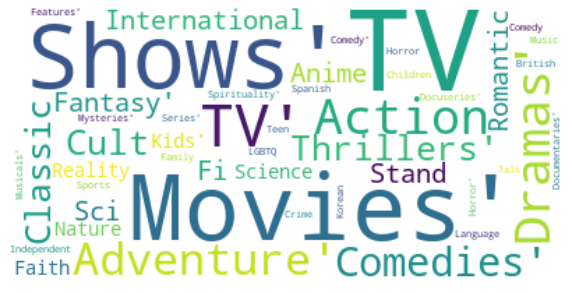

In [157]:
genres_lst=list(df_genre_new['genre'])

text = list(set(genres_lst))
plt.rcParams['figure.figsize'] = (10, 8)

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
#df_genre_new.to_csv('df_genre_new.csv')

### Let's focus on few of the main Genres

The movies listed under to_remove list, are not particularly of any genre. So, we are going to remove these specific rows for now.

In [23]:
to_keep = ['Mysteries','Action','Anime','Dramas','Comedies','Sci-Fi','Crime','Thrillers','Reality',"Kids'",'Documentaries','Docuseries','Family','Horror','Romantic', 'Sports', 'Science','Musicals','Classic','Cult','Stand-Up']

to_remove = ['International Movies','Independent Movies','British TV Shows', 'Korean TV Shows','International TV Shows','TV Shows','Spanish-Language TV Shows','Movies','Teen TV Shows' ]

In [188]:
sum = 0
for item in to_remove:
    idx = list(df_genre_new.index[df_genre_new['genre'] == item])
    sum += len(idx)
    print(len(idx))

print(f'Total rows to be removed',sum)

2752
756
253
151
1351
16
174
57
69
Total rows to be removed 5579


So, total rows to be removed are 5579 out of total 19323, ie. almost 29 % of the data are gonna get removed which is a significant loss but to look at the genre properly, we have to do it.

In [189]:
df_genre_new.shape

(19323, 2)

In [190]:
for item in to_remove:
    idx = list(df_genre_new.index[df_genre_new['genre'] == item])
    df_genre_new.drop(idx,axis=0, inplace=True)

In [191]:
df_genre_new.shape

(13744, 2)

Thus the unwanted to_remove list elements are removed successfully.

In [192]:
for item in df_genre_new['genre']:
    word_lst = item.split(' ')
    for element in to_keep:
        if element in word_lst :
            df_genre_new['genre'][df_genre_new['genre'] == item] = element
            break

In [193]:
df_genre_new['genre'].unique()

array(['Documentaries', 'Dramas', 'Mysteries', 'Crime', 'Action',
       'Docuseries', 'Reality', 'Romantic', 'Comedies', 'Horror',
       'Family', 'Thrillers', 'Musicals', 'Sci-Fi', "Kids'", 'Classic',
       'Anime', 'Sports', 'Science', 'Cult', 'Faith & Spirituality',
       'LGBTQ Movies', 'Stand-Up'], dtype=object)

More fine tuning like Classic, Cult, Faith n spirituality, LGBTQ movies all will be under Culture n Society genre. Then 'Mysteries and Thrillers and Crime all under 'Thriller' genre. 'Documenteries' and 'Docuseries are under Documenteries genre. Kids and Family will be under a single genre.

In [194]:
df_genre_new['genre'][df_genre_new['genre'] == 'Docuseries'] = 'Documentaries'
df_genre_new['genre'][df_genre_new['genre'] == 'Mysteries'] = 'Thrillers'
df_genre_new['genre'][df_genre_new['genre'] == 'Crime'] = 'Thrillers'
df_genre_new['genre'][df_genre_new['genre'] == 'Stand-Up'] = 'Comedies'
df_genre_new['genre'][df_genre_new['genre'] == "Kids'" ] = 'Family'
df_genre_new['genre'][df_genre_new['genre'] == "Classic"] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'Cult' ] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'Faith & Spirituality'] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'LGBTQ Movies'] = 'Culture and Society'

In [195]:
df_genre_new['genre'].unique()

array(['Documentaries', 'Dramas', 'Thrillers', 'Action', 'Reality',
       'Romantic', 'Comedies', 'Horror', 'Family', 'Musicals', 'Sci-Fi',
       'Culture and Society', 'Anime', 'Sports', 'Science'], dtype=object)

Thus these are the final genres on which we going to focus. 

In [196]:
df_genre_new.head()

show_id          genre
0      s1  Documentaries
2      s2         Dramas
3      s2      Thrillers
4      s3      Thrillers
6      s3         Action

As we already built a cleaned genre column so we are going to remove the unstructured 'listed in' column.

In [197]:
df_genre_new2 = df_genre.drop(['listed_in'], axis=1)
df_genre_new2.head()

show_id     type        country  release_year   duration
0      s1    Movie  United States          2020     90 min
1      s2  TV Show   South Africa          2021  2 Seasons
2      s3  TV Show            NaN          2021   1 Season
3      s4  TV Show            NaN          2021   1 Season
4      s5  TV Show          India          2021  2 Seasons

So, now let's merge the two table 

In [198]:
df_genre_final = df_genre_new.merge(df_genre_new2, on='show_id', how='left')
df_genre_final.head()

show_id          genre     type        country  release_year   duration
0      s1  Documentaries    Movie  United States          2020     90 min
1      s2         Dramas  TV Show   South Africa          2021  2 Seasons
2      s2      Thrillers  TV Show   South Africa          2021  2 Seasons
3      s3      Thrillers  TV Show            NaN          2021   1 Season
4      s3         Action  TV Show            NaN          2021   1 Season

In [199]:
df_genre_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13744 entries, 0 to 13743
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       13744 non-null  object
 1   genre         13744 non-null  object
 2   type          13744 non-null  object
 3   country       12558 non-null  object
 4   release_year  13744 non-null  int64 
 5   duration      13744 non-null  object
dtypes: int64(1), object(5)
memory usage: 751.6+ KB


Thus the final dataframe is created to visualize the genre of the movies released along with other parameters like type and states and all. Lets first simply look at the frequency of the genre column.

In [35]:
df_genre_vis = pd.DataFrame(df_genre_final.genre.value_counts())
df_genre_vis.rename(columns={'genre':'freq'}, inplace=True)
df_genre_vis.index.names=['index']
df_genre_vis['genre'] = df_genre_vis.index
df_genre_vis = df_genre_vis.sort_values('genre')
df_genre_vis

freq                genre
index                                         
Action               1027               Action
Anime                 247                Anime
Comedies             2654             Comedies
Culture and Society   382  Culture and Society
Documentaries        1264        Documentaries
Dramas               3190               Dramas
Family               1092               Family
Horror                432               Horror
Musicals              375             Musicals
Reality               255              Reality
Romantic              986             Romantic
Sci-Fi                327               Sci-Fi
Science                92              Science
Sports                219               Sports
Thrillers            1202            Thrillers

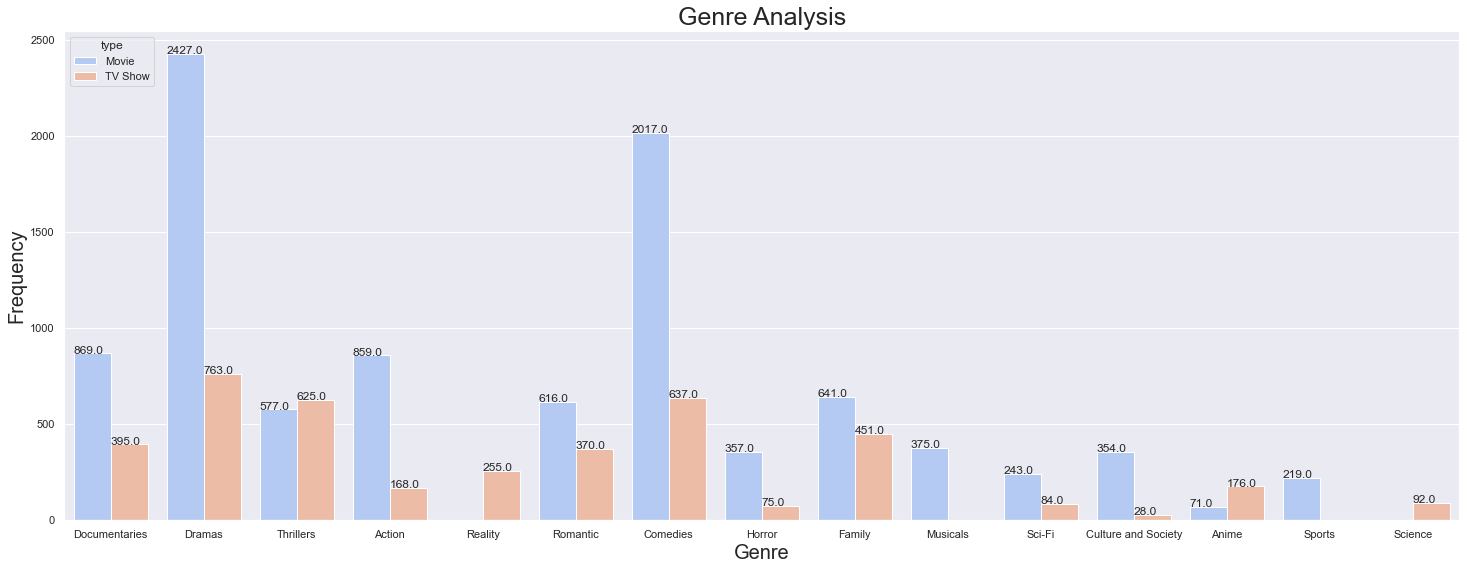

In [36]:
sns.set(font_scale = 1.2)
sns.set(rc={'figure.figsize':(25,9)})
sns.set_theme(style='darkgrid')

ax = sns.countplot(x='genre', hue='type', data=df_genre_final, palette='coolwarm')

ax.set_title('Genre Analysis', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))

So, the amount of product released or added in Netflix depends a lot on the genre of the product. And its very clear that movies get released way more than TV Shows in Netflix while, in genral, it often seems that it's the amazing TV Shows which rise Netflix to this level where it belongs.<br> 
<p>And if we wanna see different genre counts for movies and tv shows individually, we better divide the dataset for two types of shows.

In [37]:
show_genre = df_genre_final.loc[df_genre_final['type'] == 'TV Show'].drop(['type'], axis=1).sort_values('genre')
show_genre.head()

show_id   genre                              country  release_year  \
4200   s2629  Action                       United Kingdom          2020   
2098   s1299  Action                          South Korea          2021   
3864   s2416  Action  United States, Mexico, Spain, Malta          2018   
3845   s2406  Action                        United States          2020   
6889   s4366  Action                               Canada          2018   

       duration  
4200  4 Seasons  
2098   1 Season  
3864  4 Seasons  
3845  5 Seasons  
6889  3 Seasons

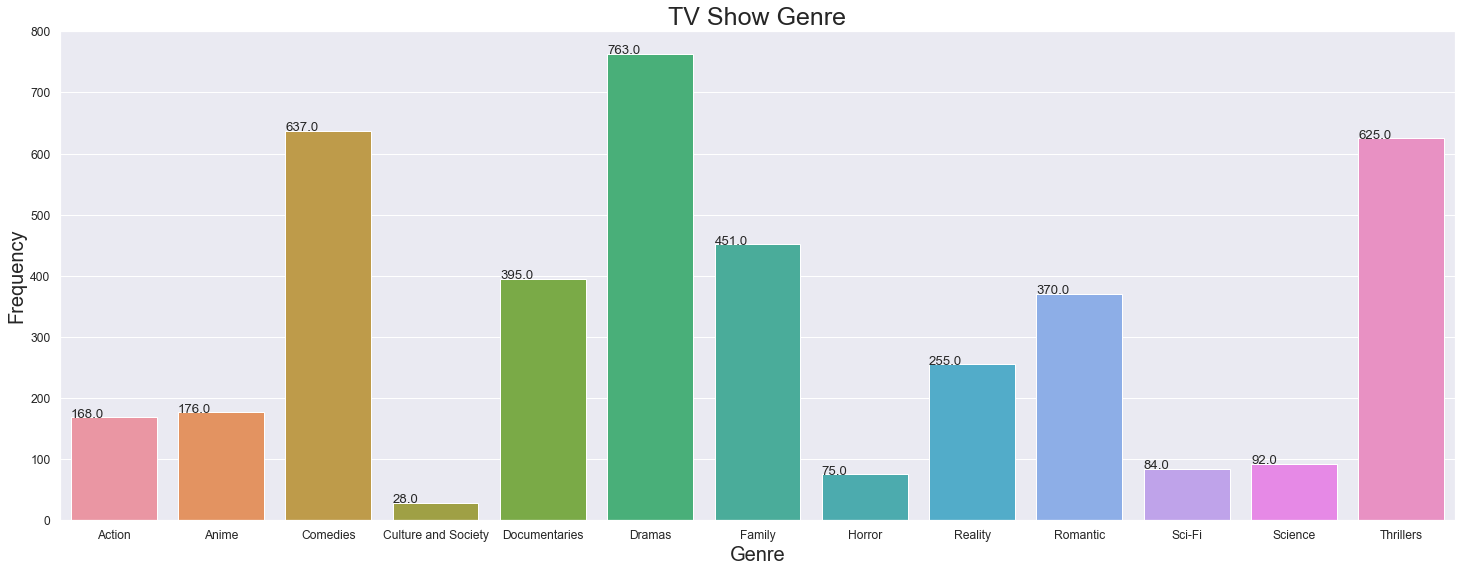

In [38]:
sns.set(font_scale = 1.1)
ax = sns.countplot(x='genre', data=show_genre)

ax.set_title('TV Show Genre', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In [39]:
movie_genre = df_genre_final.loc[df_genre_final['type'] == 'Movie'].drop(['type'], axis=1).sort_values('genre')
movie_genre.head()

show_id   genre        country  release_year duration
7470    s4731  Action          India          2016  168 min
11014   s7072  Action  United States          1989  127 min
11017   s7073  Action  United States          1981  116 min
2251    s1397  Action  United States          2013  100 min
11020   s7074  Action  United States          1984  119 min

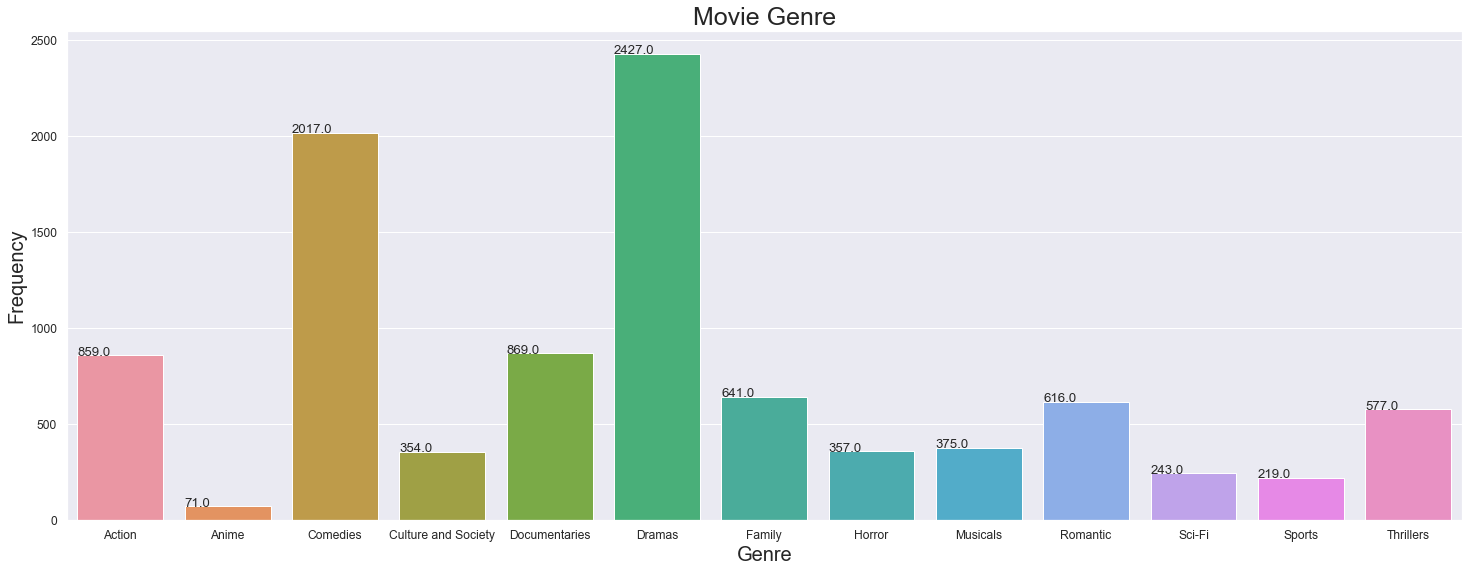

In [40]:
sns.set(font_scale = 1.1)
ax = sns.countplot(x='genre', data=movie_genre)

ax.set_title('Movie Genre', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

So, we can clearly see the genre differences between movies and tv shows. Like for example in thriller genre the difference is very clear. Again, for drama genre both types of products get released in an equal amount. Here the numerical values DO NOT represent the exact number of shows released as, one single show may be considered under different genre sections. So, this analysis is just to get an in depth idea how genre to genre release amount differs. Its more like a comparison rather than an exact amount of releases.

## <b>Country Dependency</b>

In [200]:
df_country = df_raw[['show_id','type','country']]
df_country.head()

show_id     type        country
0      s1    Movie  United States
1      s2  TV Show   South Africa
2      s3  TV Show            NaN
3      s4  TV Show            NaN
4      s5  TV Show          India

In [42]:
df_country['country'].isnull().sum()

831

In [43]:
df_country = df_country.dropna(axis=0, how='any')
df_country['country'].isnull().sum()

0

We successfully removed the rows containing null values for Country column. Now lets look how many different countries are registered in the dataset.

In [45]:
len(df_country.country.unique())

748

But here more than one country are assigned for a single product id or show id. So, we need to unnest it first.

In [201]:
country_lst = df_country['country'].apply(lambda x: str(x).split(", ")).tolist()
country_lst[:10]

[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States']]

In [202]:
len(country_lst)

8807

In [224]:
df_country_melted = pd.DataFrame(country_lst,index = df_country['show_id'])
df_country_melted.head()

0     1     2     3     4     5     6     7     8     9   \
show_id                                                                        
s1       United States  None  None  None  None  None  None  None  None  None   
s2        South Africa  None  None  None  None  None  None  None  None  None   
s3                 nan  None  None  None  None  None  None  None  None  None   
s4                 nan  None  None  None  None  None  None  None  None  None   
s5               India  None  None  None  None  None  None  None  None  None   

           10    11  
show_id              
s1       None  None  
s2       None  None  
s3       None  None  
s4       None  None  
s5       None  None

In [225]:
df_country_new = pd.DataFrame(df_country_melted.stack()).reset_index()
df_country_new.head()

show_id  level_1              0
0      s1        0  United States
1      s2        0   South Africa
2      s3        0            nan
3      s4        0            nan
4      s5        0          India

In [227]:
df_country_new.drop(['level_1'], axis=1, inplace=True)

In [228]:
df_country_new.rename(columns={0:'country'}, inplace=True)
df_country_new.head()

show_id        country
0      s1  United States
1      s2   South Africa
2      s3            nan
3      s4            nan
4      s5          India

Lets include the type column in this dataframe

In [216]:
df_country_final = df_country_new.merge(df_country[['show_id','type']], on='show_id', how='left')
df_country_final.head()

show_id        country     type
0      s1  United States    Movie
1      s2   South Africa  TV Show
2      s3            nan  TV Show
3      s4            nan  TV Show
4      s5          India  TV Show

Start making frequency Table for Both Types.

In [299]:
df_country_freq = pd.DataFrame(df_country_new['country'].value_counts()).sort_index()
df_country_freq.head()

country
                   2
Afghanistan        1
Albania            1
Algeria            3
Angola             1

In [300]:
df_country_freq.rename(columns = {'country':'freq'}, inplace=True)
df_country_freq.index.names = ['index']
df_country_freq ['country'] = df_country_freq.index
df_country_freq = df_country_freq.sort_values('freq', ascending=False)
df_country_freq.head()

freq         country
index                               
United States   3689   United States
India           1046           India
nan              831             nan
United Kingdom   804  United Kingdom
Canada           445          Canada

In [302]:
import numpy as np
df_country_freq.country = df_country_freq.country.replace('nan', np.nan)
df_country_freq = df_country_freq.dropna()

In [304]:
len(df_country_freq['country'].unique())

127

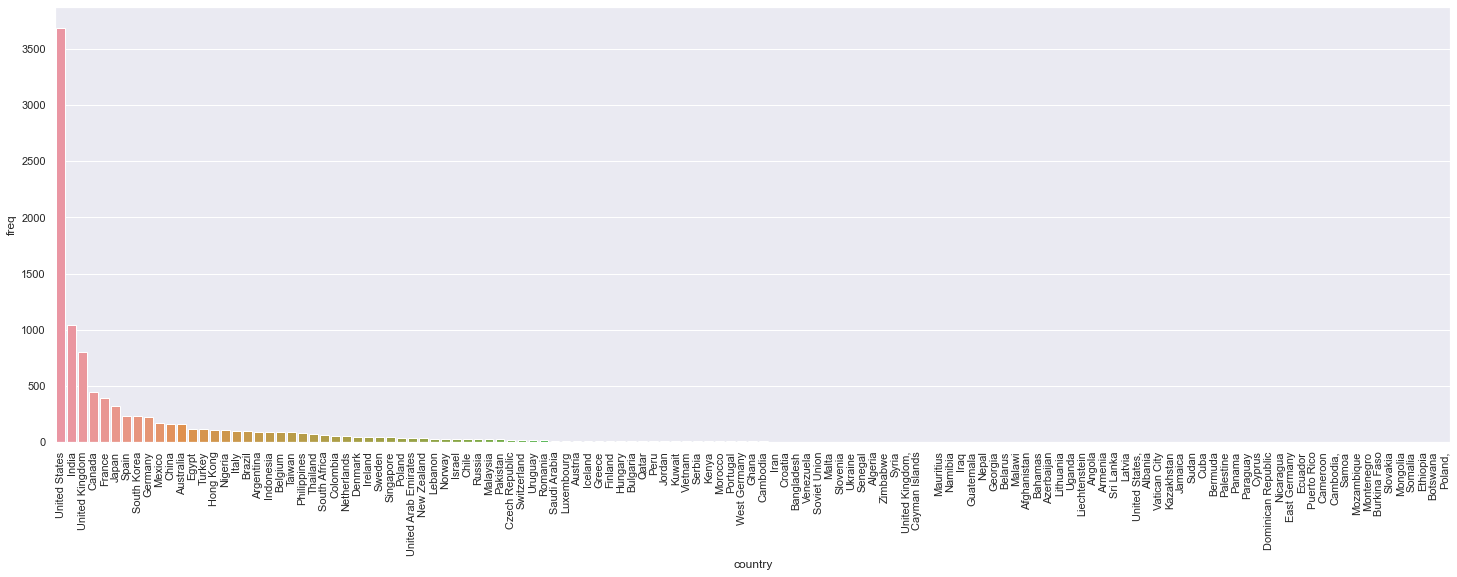

In [307]:
plt.figure(figsize=(25,8))
ax = sns.barplot(x='country',y='freq', data=df_country_freq)
ax.tick_params(axis='x', rotation=90)

### So, lets look for top 10 countries 

### Movies

Creating the frequency dataframe

In [278]:
movies= pd.DataFrame(df_country_final.loc[df_country_final['type'] == 'Movie']['country'].value_counts()).sort_index()
movies.head()

country
                   1
Afghanistan        1
Albania            1
Algeria            3
Angola             1

In [279]:
movies.rename(columns={'country':'freq_m'}, inplace=True)
movies.index.names=['index']
movies['country_m'] = movies.index
movies = movies.sort_values('freq_m', ascending=False).reset_index()

### TV Shows

In [276]:
shows = pd.DataFrame(df_country_final.loc[df_country_final['type'] == 'TV Show']['country'].value_counts()).sort_index()
shows.head()

country
                  1
Argentina        20
Australia        66
Austria           1
Azerbaijan        1

In [277]:
shows.rename(columns={'country':'freq_T'}, inplace=True)
shows.index.names=['index']
shows['country_T'] = shows.index
shows = shows.sort_values('freq_T', ascending=False).reset_index()

In [58]:
fig = px.bar(shows.iloc[:10], x = 'country_T', y = 'freq_T',
                labels={
                     "country_T": "Country",
                     "freq_T": "Number of Shows",
                        },
                title="Top 10 TV Shows Creating Countries in Netflix",
                template="plotly_dark")
fig.show()

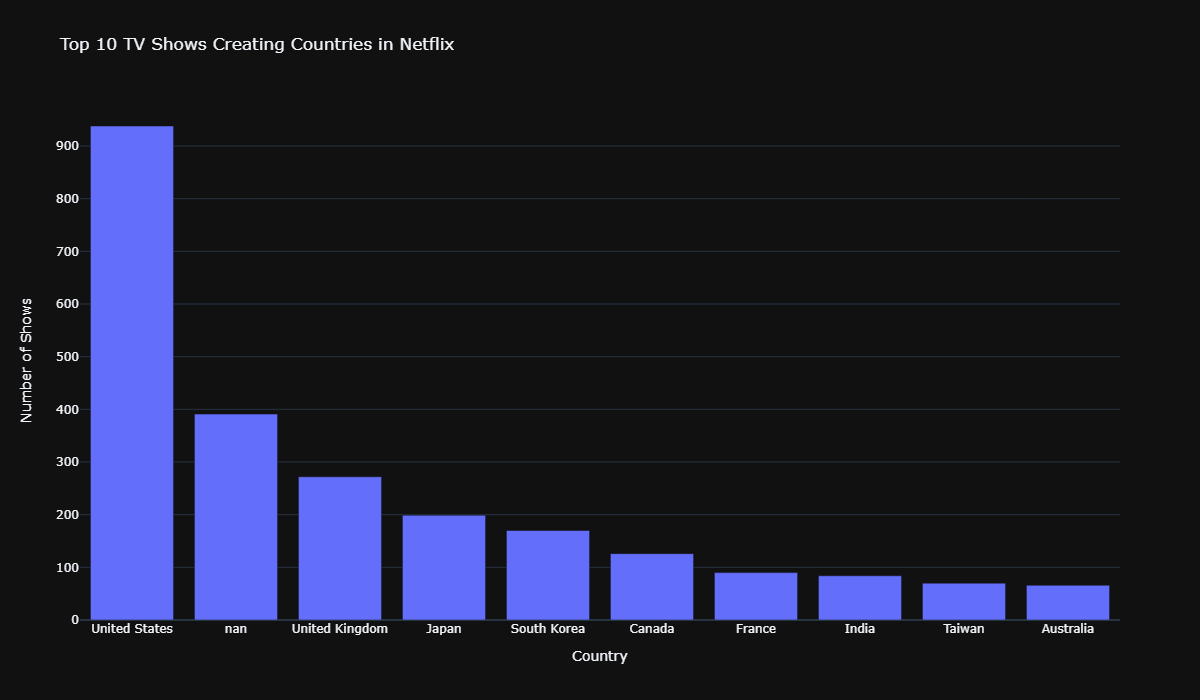

In [236]:
fig = px.bar(shows.iloc[:10], x = 'country_T', y = 'freq_T',
                labels={
                     "country_T": "Country",
                     "freq_T": "Number of Shows",
                        },
                title="Top 10 TV Shows Creating Countries in Netflix",
                template="plotly_dark")

                    ###### I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format
                    
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

### Movies

In [59]:
fig = px.bar(movies.iloc[:10], x = 'country_m', y = 'freq_m',
                labels={
                     "country_m": "Country",
                     "freq_m": "Number of Shows",
                        },
                title="Top 10 Movie Creating Countries in Netflix",
                template="plotly_dark")
fig.show()

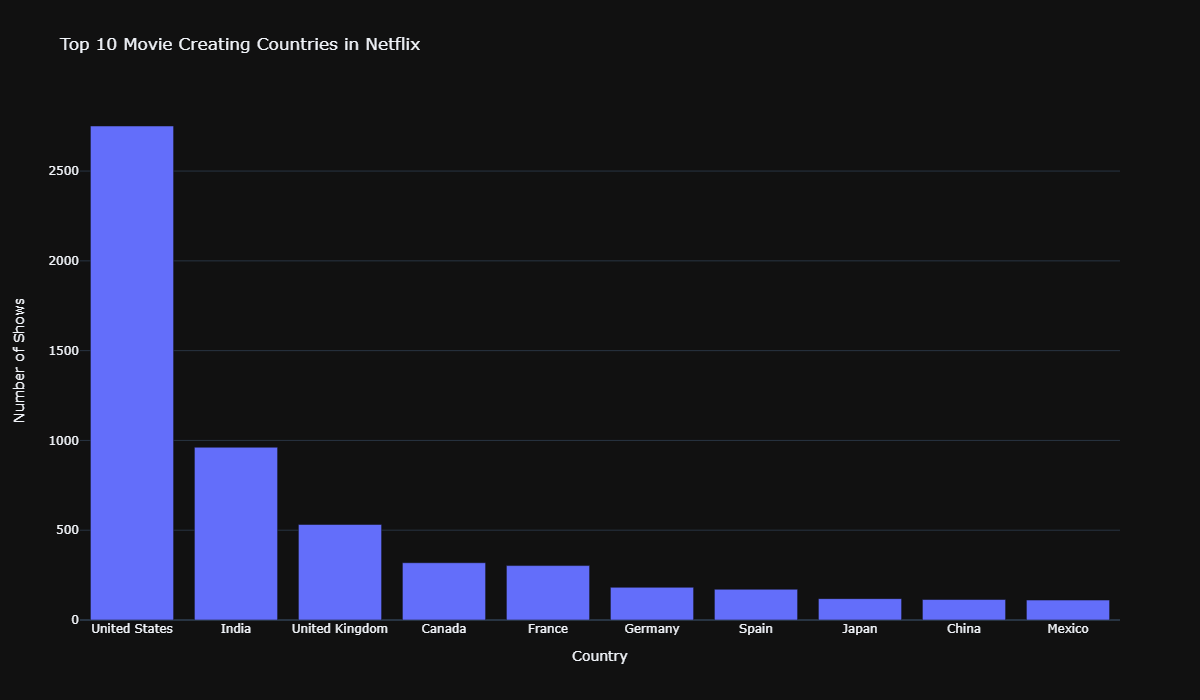

In [147]:
fig = px.bar(movies.iloc[:10], x = 'country_m', y = 'freq_m',
                labels={
                     "country_m": "Country",
                     "freq_m": "Number of Shows",
                        },
                title="Top 10 Movie Creating Countries in Netflix",
                template="plotly_dark")


                    ###### I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format
                    
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

### Top 10 Content Creating Country

In [60]:
country_lst = list(df_country_freq['country'][:10])
freq_lst = list(df_country_freq['freq'][:10])
data = dict(
    frequency = freq_lst,
    country=country_lst)

px.funnel(data, x='frequency', y='country',
            labels={"country": "Country"},
                title="Top 10 Content Creating Countries in Netflix",
                template="ggplot2")


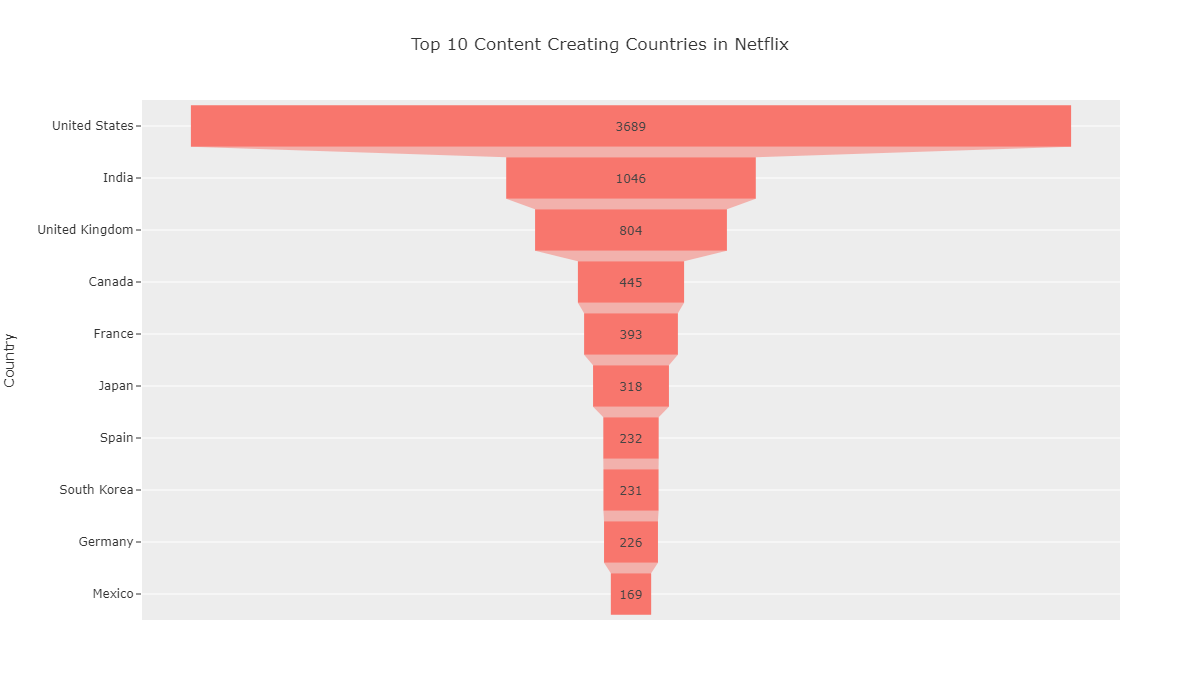

In [146]:
fig = px.funnel(data, x='frequency', y='country',
            labels={"country": "Country"},
                title="Top 10 Content Creating Countries in Netflix",
                template="ggplot2")

                    ###### I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format
                    
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

Though a huge number of countries are creating contents and also releasing contents in Netflix; only a few like, 5 to 6 countries are mainly contributing. So Netflix should consider about advertising in the other suitable locations also.

# <b>Content Rating Analysis</b>

In [237]:
df_rating = df_raw[['show_id','type','rating']]
df_rating.head()

show_id     type rating
0      s1    Movie  PG-13
1      s2  TV Show  TV-MA
2      s3  TV Show  TV-MA
3      s4  TV Show  TV-MA
4      s5  TV Show  TV-MA

In [238]:
df_rating.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [239]:
idx = df_rating.index[df_rating.rating == '74 min']
df_rating.drop(idx,axis=0, inplace=True)
idx = df_rating.index[df_rating.rating == '84 min']
df_rating.drop(idx,axis=0, inplace=True)
idx = df_rating.index[df_rating.rating == '66 min']
df_rating.drop(idx,axis=0, inplace=True)

c:\Users\writa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [240]:
df_rating = df_rating.dropna()

In [241]:
df_rating.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [242]:
fig = px.histogram(df_rating, x = 'rating', color='type')

fig.update_traces(opacity=0.65)
fig.update_layout(title='Content Ratings',
                    barmode='overlay',template='plotly_dark',width=1150, height=600)
fig.show()

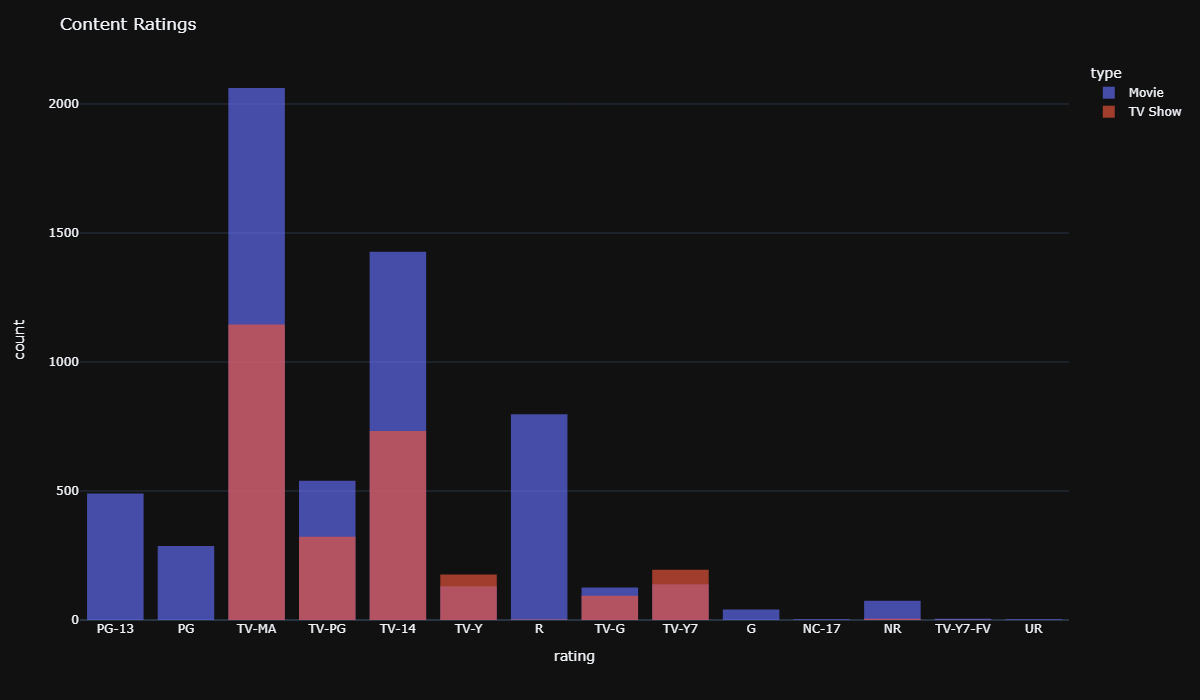

In [243]:
fig = px.histogram(df_rating, x = 'rating', color='type')

fig.update_traces(opacity=0.65)
fig.update_layout(title='Content Ratings',
                    barmode='overlay',template='plotly_dark',width=1150, height=600)


                    ###### I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format
                    
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

So, be it TV Shows or Movies, only 2 or 3 types of rated movies are mostly getting released. Like, TV-MA (TV Mature Audience Only) for example, it's rated for adults only. Then, TV 14 or R rated contents receiving focus only.

# <b>Content Release Rate

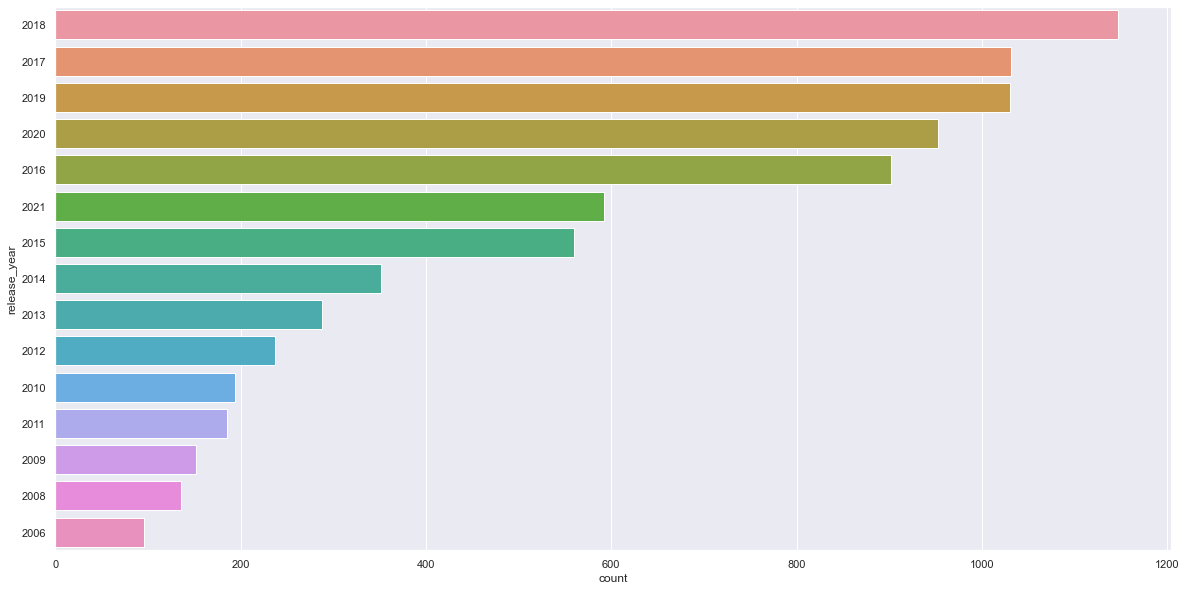

In [245]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_raw, order=df_raw['release_year'].value_counts().index[0:15])

So, in last one or one and a half decade, it's basically 2018 when, most contents were released. 2020 statistics is understandable though.That's basically COVID effect. But they need to re-build the momentum, as we can see in 2019 the number was 1000 plus, then in 2020 its around 900 plus and in 2021 it has reduced to below 600. 

### Now, let's jump into a more detailed analysis like when in a year, most amount of movies get released usually

In [273]:
df_date = df_raw[['date_added']].dropna()
df_date['year'] = df_date['date_added'].apply(lambda x : x.split(', ')[-1])
df_date['month'] = df_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df_date.head()

date_added  year      month
0  September 25, 2021  2021  September
1  September 24, 2021  2021  September
2  September 24, 2021  2021  September
3  September 24, 2021  2021  September
4  September 24, 2021  2021  September

In [271]:
df_date_new = df_date.groupby('year')['month'].value_counts()
df_date_new.head()

year  month   
2008  February    1
      January     1
2009  May         1
      November    1
2010  November    1
Name: month, dtype: int64

Now ,if we unstack it, we will get the counts for every months in every single year. Thus we get the required format.

In [248]:
df_date_final = df_date_new.unstack()
df_date_final

month  April  August  December  February  January   July   June  March    May  \
year                                                                            
2008     NaN     NaN       NaN       1.0      1.0    NaN    NaN    NaN    NaN   
2009     NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN    1.0   
2010     NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN    NaN   
2011     NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN    1.0   
2012     NaN     NaN       1.0       1.0      NaN    NaN    NaN    NaN    NaN   
2013     NaN     1.0       2.0       NaN      NaN    NaN    NaN    1.0    NaN   
2014     2.0     1.0       6.0       2.0      2.0    1.0    1.0    NaN    NaN   
2015     5.0     2.0      21.0       4.0      1.0    7.0    6.0    5.0    6.0   
2016    22.0    34.0      96.0      15.0     43.0   28.0   18.0   17.0   13.0   
2017    93.0   115.0     118.0      82.0     72.0   79.0   94.0  125.0   86.0   
2018   115.0   164.0     185.0      87.0    129.0  152.0   78.0  173.0   97.0   
2019   162.0   131.0     215.0     148.0    153.0  157.0  168.0  172.0  139.0   
2020   177.0   129.0     169.0     114.0    205.0  146.0  156.0  137.0  157.0   
2021   188.0   178.0       NaN     109.0    132.0  257.0  207.0  112.0  132.0   

month  November  October  September  
year                                 
2008        NaN      NaN        NaN  
2009        1.0      NaN        NaN  
2010        1.0      NaN        NaN  
2011        NaN     11.0        1.0  
2012        1.0      NaN        NaN  
2013        2.0      3.0        2.0  
2014        4.0      4.0        1.0  
2015        4.0     14.0        7.0  
2016       44.0     51.0       48.0  
2017       85.0    126.0      113.0  
2018      154.0    191.0      124.0  
2019      255.0    193.0      123.0  
2020      154.0    167.0      168.0  
2021        NaN      NaN      183.0

In [249]:
df_date_final.fillna(method='bfill',axis=1,inplace=True)
df_date_final.fillna(method='ffill',axis=1,inplace=True)

In [250]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_date_final = df_date_final[month_order].T
df_date_final

year       2008  2009  2010  2011  2012  2013  2014  2015  2016   2017   2018  \
month                                                                           
December    1.0   1.0   1.0   1.0   1.0   2.0   6.0  21.0  96.0  118.0  185.0   
November    1.0   1.0   1.0  11.0   1.0   2.0   4.0   4.0  44.0   85.0  154.0   
October     1.0   1.0   1.0  11.0   1.0   3.0   4.0  14.0  51.0  126.0  191.0   
September   1.0   1.0   1.0   1.0   1.0   2.0   1.0   7.0  48.0  113.0  124.0   
August      1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0  34.0  115.0  164.0   
July        1.0   1.0   1.0   1.0   1.0   1.0   1.0   7.0  28.0   79.0  152.0   
June        1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.0  18.0   94.0   78.0   
May         1.0   1.0   1.0   1.0   1.0   2.0   4.0   6.0  13.0   86.0   97.0   
April       1.0   1.0   1.0   1.0   1.0   1.0   2.0   5.0  22.0   93.0  115.0   
March       1.0   1.0   1.0   1.0   1.0   1.0   4.0   5.0  17.0  125.0  173.0   
February    1.0   1.0   1.0   1.0   1.0   1.0   2.0   4.0  15.0   82.0   87.0   
January     1.0   1.0   1.0   1.0   1.0   1.0   2.0   1.0  43.0   72.0  129.0   

year        2019   2020   2021  
month                           
December   215.0  169.0  109.0  
November   255.0  154.0  183.0  
October    193.0  167.0  183.0  
September  123.0  168.0  183.0  
August     131.0  129.0  178.0  
July       157.0  146.0  257.0  
June       168.0  156.0  207.0  
May        139.0  157.0  132.0  
April      162.0  177.0  188.0  
March      172.0  137.0  112.0  
February   148.0  114.0  109.0  
January    153.0  205.0  132.0

Text(0.3, 1.0, 'Netflix Release Rate ( Monthwise )')

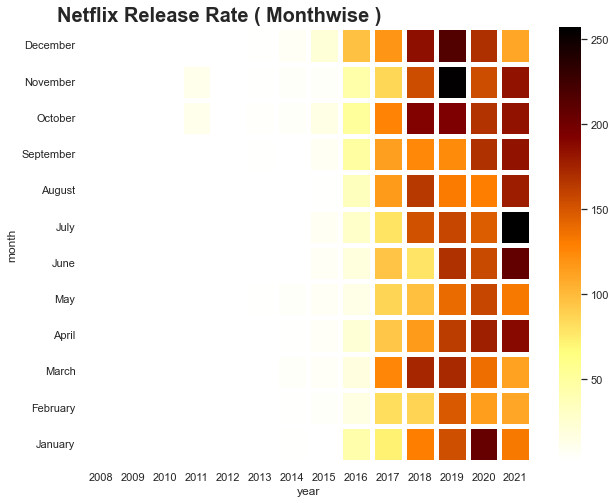

In [251]:
ax = sns.heatmap(df_date_final, annot=False, cmap='afmhot_r',edgecolor='white',linewidths=5)
plt.title('Netflix Release Rate ( Monthwise )', fontsize=20, fontweight='bold', position=(0.30, 1.0+0.02))

Netflix need to look for months when there is the least amount of movies are released. For example, in February, March in 2021, and again in December in the fall of 2021, the release count is less. So they need to think about releasing more contents in these months. The point is to distribute the release count equally as possible.

# <b>Duration Analysis

In [252]:
df_duration_m = df_raw[df_raw['type'] == 'Movie'][['show_id','duration']]
df_duration_T = df_raw[df_raw['type'] == 'TV Show'][['show_id','duration']]

### For Movies

In [253]:
df_duration_m = df_duration_m.dropna()
df_duration_m['duration'] = df_duration_m['duration'].apply(lambda x : str(x).split(' ')[0])
df_duration_m['duration'] = df_duration_m['duration'].astype(int)
df_duration_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   show_id   6128 non-null   object
 1   duration  6128 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 119.7+ KB


In [255]:
df_duration_m.head()

show_id  duration
0       s1        90
6       s7        91
7       s8       125
9      s10       104
12     s13       127

[Text(0.5, 1.0, 'Probability Density of Duration Distribution')]

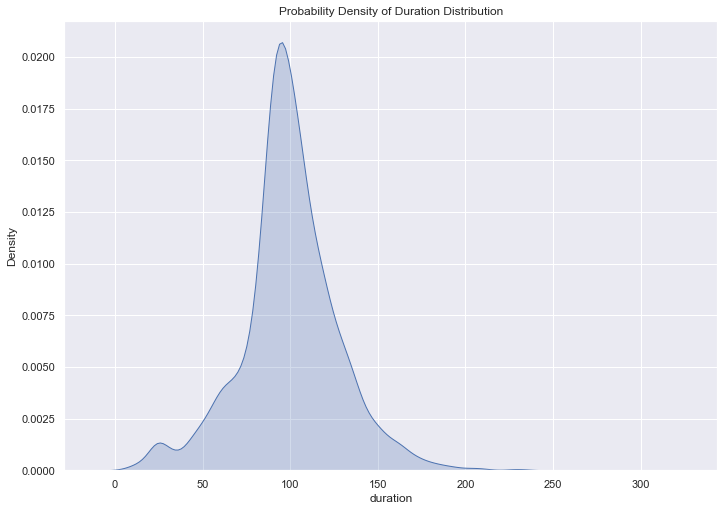

In [256]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
ax = sns.kdeplot(data=df_duration_m, x='duration', shade=True)
ax.set(title='Probability Density of Duration Distribution')

So, a good amount of movies on Netflix are among the duration of 75 to 125 minutes. As it is expected that a fair amount of audience can not afford 3 hours to watch a movie in today's life style.

### For TV Shows 

In [257]:
df_duration_T.duration.isnull().sum()

0

So, no null value problems.

In [258]:
df_duration_T['duration'] = df_duration_T['duration'].apply(lambda x : str(x).split(' ')[0])
df_duration_T['duration'] = df_duration_T['duration'].astype(int)
df_duration_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   show_id   2676 non-null   object
 1   duration  2676 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 52.3+ KB


[Text(0.5, 1.0, 'Duration Analysis for TV Shows')]

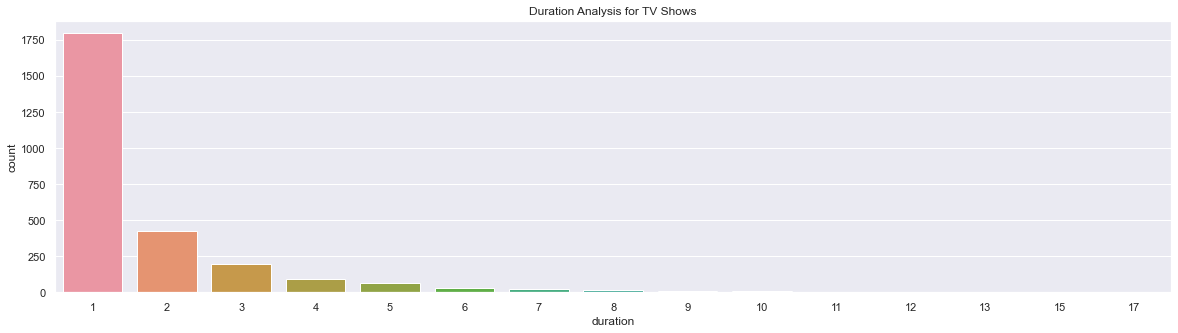

In [263]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='duration', data=df_duration_T).set(title='Duration Analysis for TV Shows')

So, its clearly seen that TV Shows with single season got released more and more. A lots of popular TV Shows may be of 9 or 10 seasons but surprisingly they are just a very small part of the whole contents that get released.

# <b> ### IMDB RATING ANALYSIS ###

dataset link : https://datasets.imdbws.com/

In [81]:
df_imdb_rating = pd.read_table('title_rating.tsv')
df_imdb_title = pd.read_table('title_basics.tsv')

c:\Users\writa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



In [82]:
df_imdb_rating.head()

tconst  averageRating  numVotes
0  tt0000001            5.7      1899
1  tt0000002            5.9       254
2  tt0000003            6.5      1692
3  tt0000004            5.7       166
4  tt0000005            6.2      2509

In [83]:
df_imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248718 entries, 0 to 1248717
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1248718 non-null  object 
 1   averageRating  1248718 non-null  float64
 2   numVotes       1248718 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ MB


In [84]:
df_imdb_title.sample(10)

tconst  titleType  \
2606859  tt12977300      short   
4745717   tt1802448  tvEpisode   
6345066   tt3842084  tvEpisode   
8357809   tt8328698  tvEpisode   
6543651   tt4288396  tvEpisode   
855903    tt0883770  tvEpisode   
660730    tt0683417  tvEpisode   
8468584   tt8568038  tvEpisode   
7815782   tt7148214  tvEpisode   
1959904  tt11778778  tvEpisode   

                                              primaryTitle  \
2606859                                          Gimme One   
4745717                    Episode dated 14 September 2010   
6345066                                          Dirty Job   
8357809                                          35. Bolum   
6543651                        Elizabeth's Entry Interview   
855903                                                I Do   
660730                                       Ludlow Laughs   
8468584                                     Episode #1.198   
7815782                                          Hidey Hup   
1959904  Blonde-haired Czech babes have some lesbian fu...   

                                             originalTitle isAdult startYear  \
2606859                                          Gimme One       0      2020   
4745717                    Episode dated 14 September 2010       0      2010   
6345066                                          Dirty Job       0      2014   
8357809                                          35. Bolum       0      2018   
6543651                        Elizabeth's Entry Interview       1      2010   
855903                                                I Do       0      2006   
660730                                       Ludlow Laughs       0      1989   
8468584                                     Episode #1.198       0      1990   
7815782                                          Hidey Hup       0        \N   
1959904  Blonde-haired Czech babes have some lesbian fu...       1      2016   

        endYear runtimeMinutes                   genres  
2606859      \N             14          Animation,Short  
4745717      \N             \N                     News  
6345066      \N             \N  Action,Adventure,Comedy  
8357809      \N             \N     Action,Drama,History  
6543651      \N             \N                    Adult  
855903       \N             43  Adventure,Drama,Fantasy  
660730       \N             29                   Family  
8468584      \N             \N    Drama,Fantasy,Romance  
7815782      \N             \N    Comedy,Family,Fantasy  
1959904      \N             \N                    Adult

In [85]:
df_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089445 entries, 0 to 9089444
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 624.1+ MB


In [86]:
df_imdb = df_imdb_rating[['tconst','averageRating']].merge(df_imdb_title[['tconst','primaryTitle']], on='tconst', how='left')

In [87]:
df_imdb.sample(10)

tconst  averageRating                  primaryTitle
168490    tt0280468            5.6  Bean Sprouts and Salted Fish
604026    tt1316079            5.1                 Summer People
1104201   tt6337102            7.2         Do Not Send Us Astray
770926   tt18378194            8.4               ¡Dolores Guapa!
1211700   tt8846676            9.0                 Episode #1.10
1102428   tt6304956            6.7                  Episode #1.1
529385   tt11548118            7.3                Kampung People
1010653   tt4777176            7.0    Cloris Leachman/Pia Zadora
532717    tt1161887            8.4                  Episode #1.9
917883    tt3293364            6.8     Nepal, Himalajan armoilla

Now, we can safely remove the 'tconst' column.

In [88]:
df_imdb.drop('tconst', axis=1, inplace=True)
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248718 entries, 0 to 1248717
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   averageRating  1248718 non-null  float64
 1   primaryTitle   1248718 non-null  object 
dtypes: float64(1), object(1)
memory usage: 28.6+ MB


Let's save this imdb rating dataset as a csv file, as the original datasets are of heavy size so it could be problem to upload and all.

In [89]:
#df_imdb.to_csv('imdb_rating.csv')

Now, let's merge this dataset with our previous dataset df_raw

In [90]:
df_raw_rating = df_raw.merge(df_imdb, left_on='title', right_on='primaryTitle',how='left')

In [91]:
df_raw_rating.head()

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s2  TV Show         Blood & Water              NaN   
3      s2  TV Show         Blood & Water              NaN   
4      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
3  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
4  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA  2 Seasons   
3  September 24, 2021          2021  TV-MA  2 Seasons   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   
2  International TV Shows, TV Dramas, TV Mysteries   
3  International TV Shows, TV Dramas, TV Mysteries   
4  International TV Shows, TV Dramas, TV Mysteries   

                                         description  averageRating  \
0  As her father nears the end of his life, filmm...            7.4   
1  After crossing paths at a party, a Cape Town t...            7.9   
2  After crossing paths at a party, a Cape Town t...            7.3   
3  After crossing paths at a party, a Cape Town t...            7.3   
4  After crossing paths at a party, a Cape Town t...            6.6   

           primaryTitle  
0  Dick Johnson Is Dead  
1         Blood & Water  
2         Blood & Water  
3         Blood & Water  
4         Blood & Water

Let's save this dataset also

In [92]:
#df_raw_rating.to_csv('Netflix_IMDBrating.csv')

In [93]:
genre_data = df_raw_rating[['show_id','title','averageRating','type','country', 'release_year', 'duration']]
genre_final = genre_data[['show_id','title','averageRating']].merge(df_genre_final, on='show_id',how='left')

In [94]:
genre_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47094 entries, 0 to 47093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        47094 non-null  object 
 1   title          47094 non-null  object 
 2   averageRating  44421 non-null  float64
 3   genre          46940 non-null  object 
 4   type           46940 non-null  object 
 5   country        43837 non-null  object 
 6   release_year   46940 non-null  float64
 7   duration       46940 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.2+ MB


In [95]:
genre_final.head()

show_id                 title  averageRating          genre     type  \
0      s1  Dick Johnson Is Dead            7.4  Documentaries    Movie   
1      s2         Blood & Water            7.9         Dramas  TV Show   
2      s2         Blood & Water            7.9      Thrillers  TV Show   
3      s2         Blood & Water            7.3         Dramas  TV Show   
4      s2         Blood & Water            7.3      Thrillers  TV Show   

         country  release_year   duration  
0  United States        2020.0     90 min  
1   South Africa        2021.0  2 Seasons  
2   South Africa        2021.0  2 Seasons  
3   South Africa        2021.0  2 Seasons  
4   South Africa        2021.0  2 Seasons

In [96]:
genre_rating = genre_final.dropna()
genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41803 entries, 0 to 47093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        41803 non-null  object 
 1   title          41803 non-null  object 
 2   averageRating  41803 non-null  float64
 3   genre          41803 non-null  object 
 4   type           41803 non-null  object 
 5   country        41803 non-null  object 
 6   release_year   41803 non-null  float64
 7   duration       41803 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.9+ MB


In [97]:
genre_rating.sample(6)

show_id          title  averageRating      genre     type  \
24649   s4539  Truth or Dare            8.6     Horror    Movie   
18909   s3228   The Irishman            5.4     Dramas    Movie   
8474    s1307     Good Girls            7.7  Thrillers  TV Show   
11057   s1856         A Choo            5.5   Romantic    Movie   
26973   s4974        Requiem            7.6     Dramas  TV Show   
37209   s7060     In Between            6.8   Romantic  TV Show   

              country  release_year   duration  
24649   United States        2017.0     88 min  
18909   United States        2019.0    209 min  
8474    United States        2020.0  3 Seasons  
11057          Taiwan        2020.0    101 min  
26973  United Kingdom        2018.0   1 Season  
37209          Taiwan        2012.0   1 Season

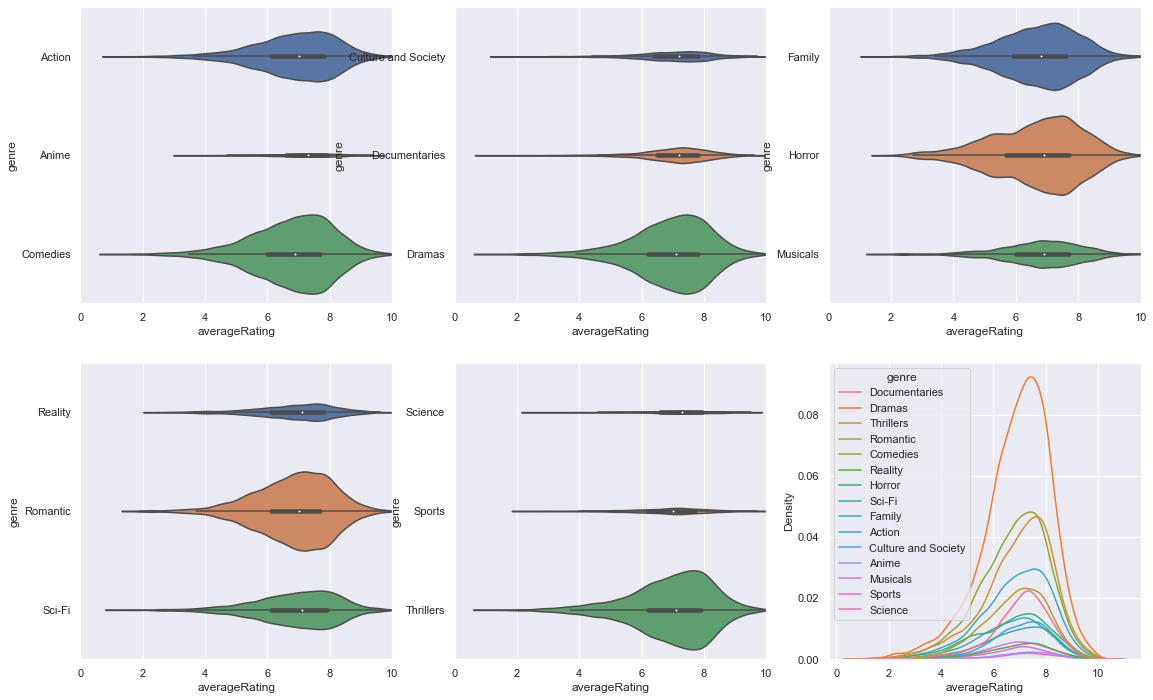

In [98]:
fig,axes = plt.subplots(2,3)
fig.set_size_inches(19, 12)


genre_array = genre_rating['genre'].unique()
genre_array.sort()
genre_lst = list(genre_array)

i = 0
j = 0
axes_lst = axes.flatten()
while ((i < len(genre_lst)) or (j == 5)):
    if j == 5 :
        sns.kdeplot(data=genre_rating, x='averageRating' ,hue='genre',ax=axes_lst[j])
        break
    axes_lst[j].set_xlim((0,10))
    axes_lst[j].set_ylim((0,1))
    item_lst = [genre_lst[i],genre_lst[i+1],genre_lst[i+2]]   
    genre_cluster = genre_rating.loc[genre_rating['genre'].isin(item_lst)]
    genre_cluster = genre_cluster.sort_values('genre')
    sns.violinplot(data = genre_cluster, x='averageRating',y = 'genre', scale = 'count',bw=0.15, ax=axes_lst[j])
   
    i += 3
    j += 1

Thus we get a whole idea about the average imdb rating genre wise. It can be said that the quality of pretty much each and every genre is maintained properly. More or less every genre has an avg rating of 7 which is a pretty good stat !

 # <b> IMDB RATING ANALYSIS ( TYPE-WISE )

## <B>MOVIE Rating

In [99]:
movie_r = genre_rating.loc[genre_rating['type'] == 'Movie']

In [100]:
movie_r.head()

show_id                 title  averageRating          genre   type  \
0       s1  Dick Johnson Is Dead            7.4  Documentaries  Movie   
33      s8               Sankofa            7.0         Dramas  Movie   
34      s8               Sankofa            6.9         Dramas  Movie   
36     s10          The Starling            6.3       Comedies  Movie   
37     s10          The Starling            6.3         Dramas  Movie   

                                              country  release_year duration  
0                                       United States        2020.0   90 min  
33  United States, Ghana, Burkina Faso, United Kin...        1993.0  125 min  
34  United States, Ghana, Burkina Faso, United Kin...        1993.0  125 min  
36                                      United States        2021.0  104 min  
37                                      United States        2021.0  104 min

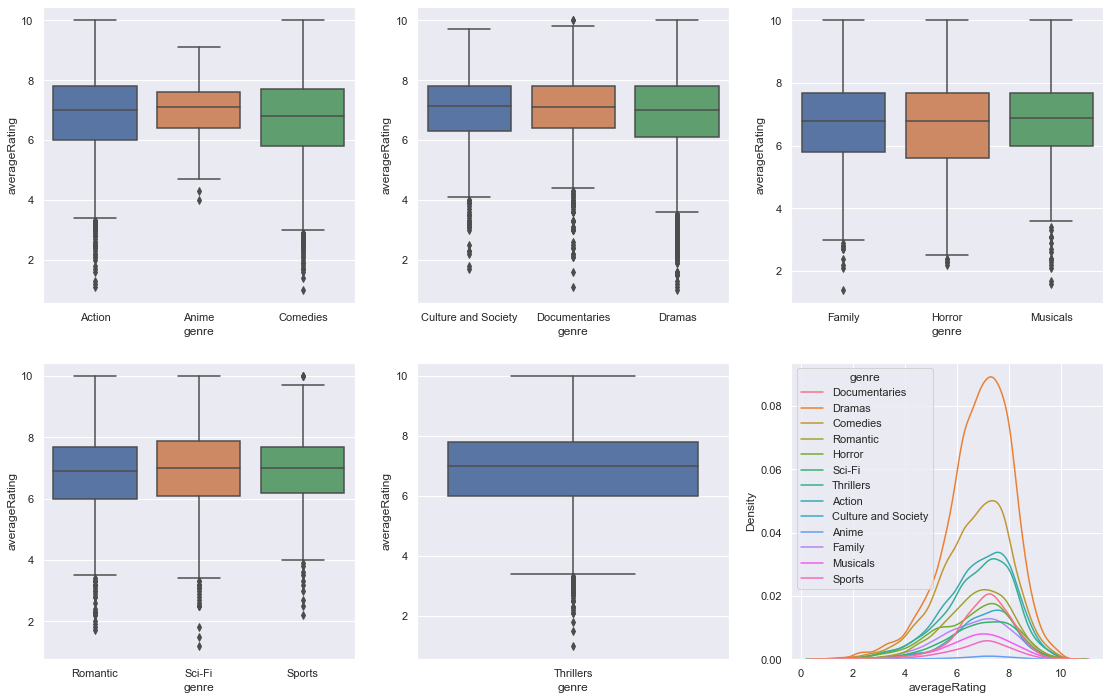

In [101]:
fig,axes = plt.subplots(2,3)
fig.set_size_inches(19, 12)

genre_array = movie_r['genre'].unique()
genre_array.sort()
genre_lst = list(genre_array)

i = 0
j = 0
axes_lst = axes.flatten()
while (i < (len(genre_lst)-1) or j>3):
    if j == 4:
        sns.boxplot(data = movie_r.loc[movie_r['genre'] == genre_lst[-1]], y='averageRating',x = 'genre', ax=axes_lst[j])

    if j == 5 :
        sns.kdeplot(data=movie_r, x='averageRating' ,hue='genre', ax=axes_lst[j])
        break

    if j <= 3 :
        item_lst = [genre_lst[i],genre_lst[i+1],genre_lst[i+2]]   
        genre_cluster = movie_r.loc[movie_r['genre'].isin(item_lst)]
        genre_cluster = genre_cluster.sort_values('genre')
        sns.boxplot(data = genre_cluster, y='averageRating',x = 'genre', ax=axes_lst[j])
   
    i += 3
    j += 1

## <b>SHOW Rating

In [102]:
show_r = genre_rating.loc[genre_rating['type'] == 'TV Show']
len(show_r.genre.unique())

13

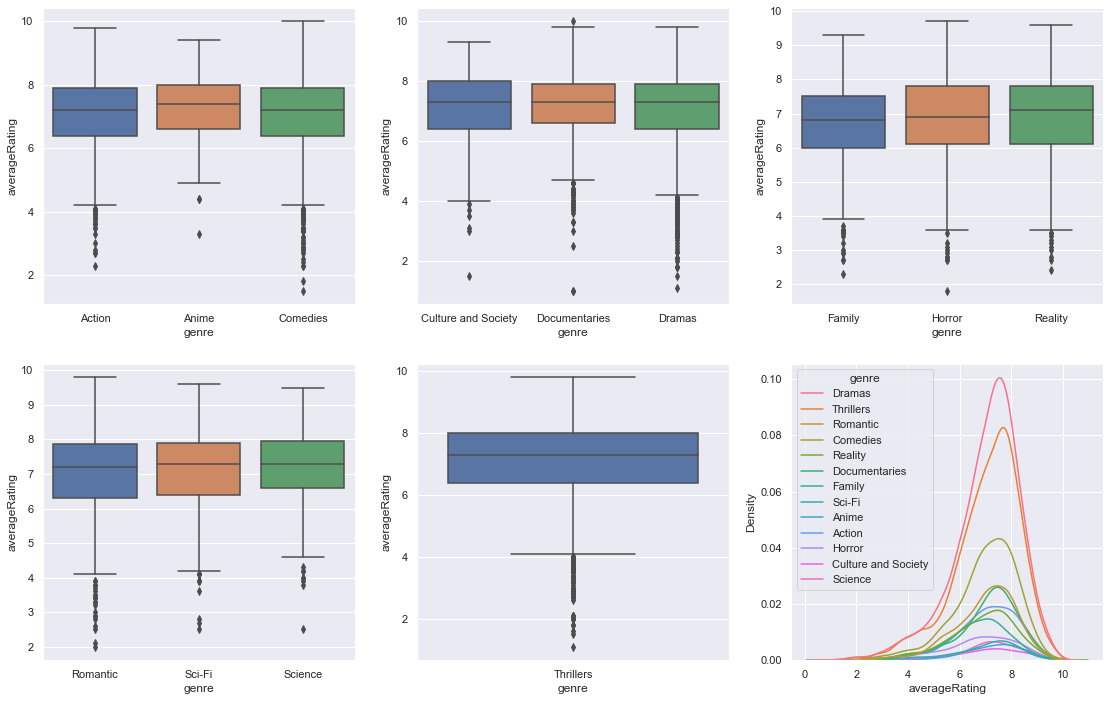

In [103]:
fig,axes = plt.subplots(2,3)
fig.set_size_inches(19, 12)


genre_array = show_r['genre'].unique()
genre_array.sort()
genre_lst = list(genre_array)

i = 0
j = 0
axes_lst = axes.flatten()
while (i < (len(genre_lst)-1) or j>3):
    if j == 4:
        sns.boxplot(data = show_r.loc[show_r['genre'] == genre_lst[-1]], y='averageRating',x = 'genre', ax=axes_lst[j])

    if j == 5 :
        sns.kdeplot(data=show_r, x='averageRating' ,hue='genre', ax=axes_lst[j])
        break

    if j <= 3 :
        item_lst = [genre_lst[i],genre_lst[i+1],genre_lst[i+2]]   
        genre_cluster = show_r.loc[show_r['genre'].isin(item_lst)]
        genre_cluster = genre_cluster.sort_values('genre')
        sns.boxplot(data = genre_cluster, y='averageRating',x = 'genre', ax=axes_lst[j])
   
    i += 3
    j += 1

Thus we can see even after analyzing the movie and show types also, the contents are rated 7 + in  IMDB as an average. Though, it can be said after a minute observation that the shows are slightly high rated.

# <b>YEARWISE QUALITY ANALYSIS

In [264]:
yearwise_r = df_raw_rating[['show_id','release_year','averageRating','type']]
yearwise_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28992 entries, 0 to 28991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        28992 non-null  object 
 1   release_year   28992 non-null  int64  
 2   averageRating  27180 non-null  float64
 3   type           28992 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [265]:
yearwise_r.head()

show_id  release_year  averageRating     type
0      s1          2020            7.4    Movie
1      s2          2021            7.9  TV Show
2      s2          2021            7.3  TV Show
3      s2          2021            7.3  TV Show
4      s2          2021            6.6  TV Show

sfsf

In [267]:
fig = px.scatter(yearwise_r, x='averageRating', y='release_year', marginal_x = 'box',opacity = 0.3, template='ggplot2', width = 1500, height= 500,
                    title = 'Yearwise Quality Analysis')
fig.show()

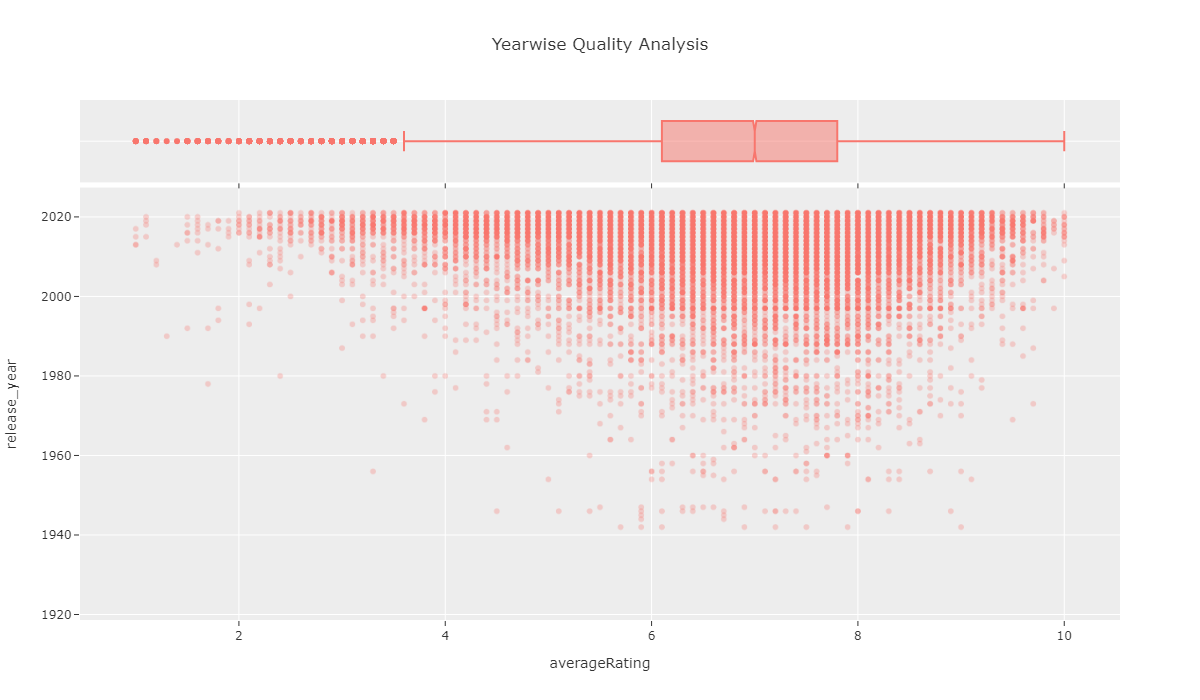

In [266]:
fig = px.scatter(yearwise_r, x='averageRating', y='release_year', marginal_x = 'box',opacity = 0.3, template='ggplot2', width = 1500, height= 500,
                    title = 'Yearwise Quality Analysis')

                    # I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

Thus we can clearly see that now a days may be the production release rate increased but, the quality also has a huge variation from below 2 to above 7. So the screening team may start filtering more strictly. Again, the new comers of course need to be encouraged simultaneously.

# <b>Duration Dependence of Rating

In [107]:
df_duration_T.head()

show_id  duration
1      s2         2
2      s3         1
3      s4         1
4      s5         2
5      s6         1

In [108]:
df_duration_m.head()

show_id  duration
0       s1        90
6       s7        91
7       s8       125
9      s10       104
12     s13       127

In [109]:
duration_rating_m = movie_r[['show_id','averageRating','release_year']].merge(df_duration_m, on='show_id', how='left')
duration_rating_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29522 entries, 0 to 29521
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        29522 non-null  object 
 1   averageRating  29522 non-null  float64
 2   release_year   29522 non-null  float64
 3   duration       29522 non-null  int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 1.0+ MB


In [110]:
duration_rating_T = show_r[['show_id','averageRating','release_year']].merge(df_duration_T, on='show_id', how='left')

In [111]:
fig = px.scatter(duration_rating_m, x='duration', y='averageRating', marginal_x = 'violin',marginal_y = 'box',opacity = 0.2, template='plotly_dark', width = 1400, height= 800, title = 'Duration Dependence of Movie Rating')
fig.show()

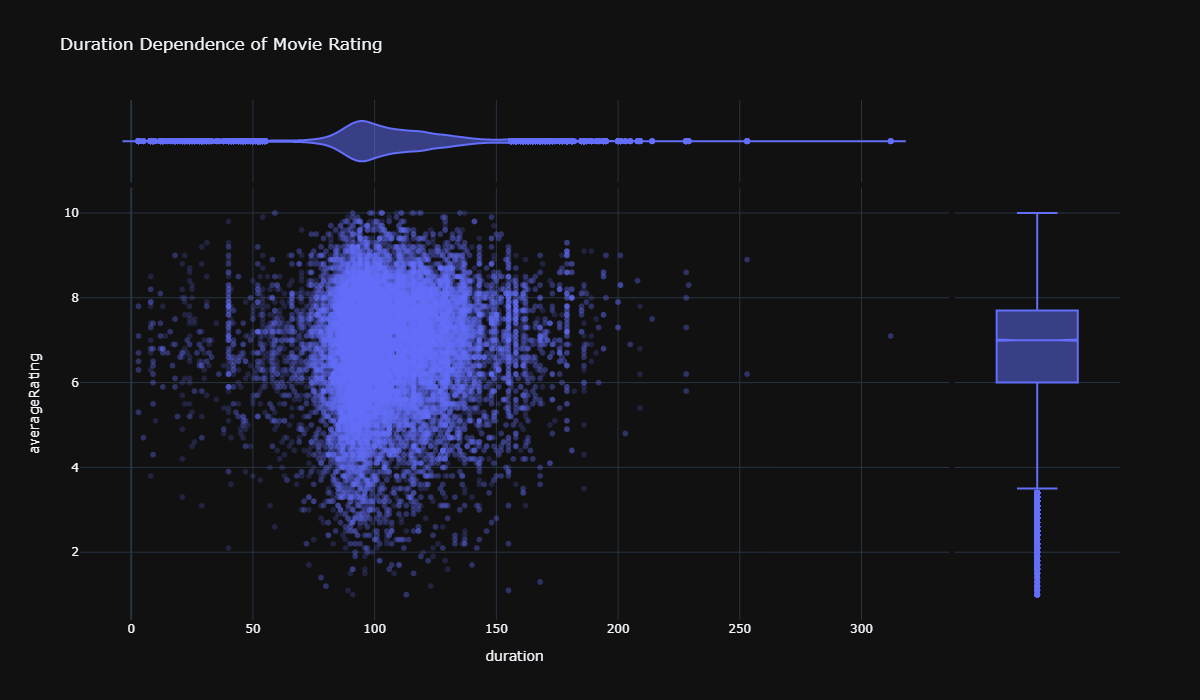

In [140]:
# I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format

fig = px.scatter(duration_rating_m, x='duration', y='averageRating', marginal_x = 'violin',marginal_y = 'box',opacity = 0.2, template='plotly_dark', width = 1400, height= 800, title = 'Duration Dependence of Movie Rating')

from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

In [142]:
fig = px.scatter(duration_rating_T, x='duration', y='averageRating', marginal_x = 'violin',marginal_y = 'box',opacity = 0.2, template='plotly_dark', width = 1400, height= 800, title = 'Duration Dependence of Show Rating')
fig.show()

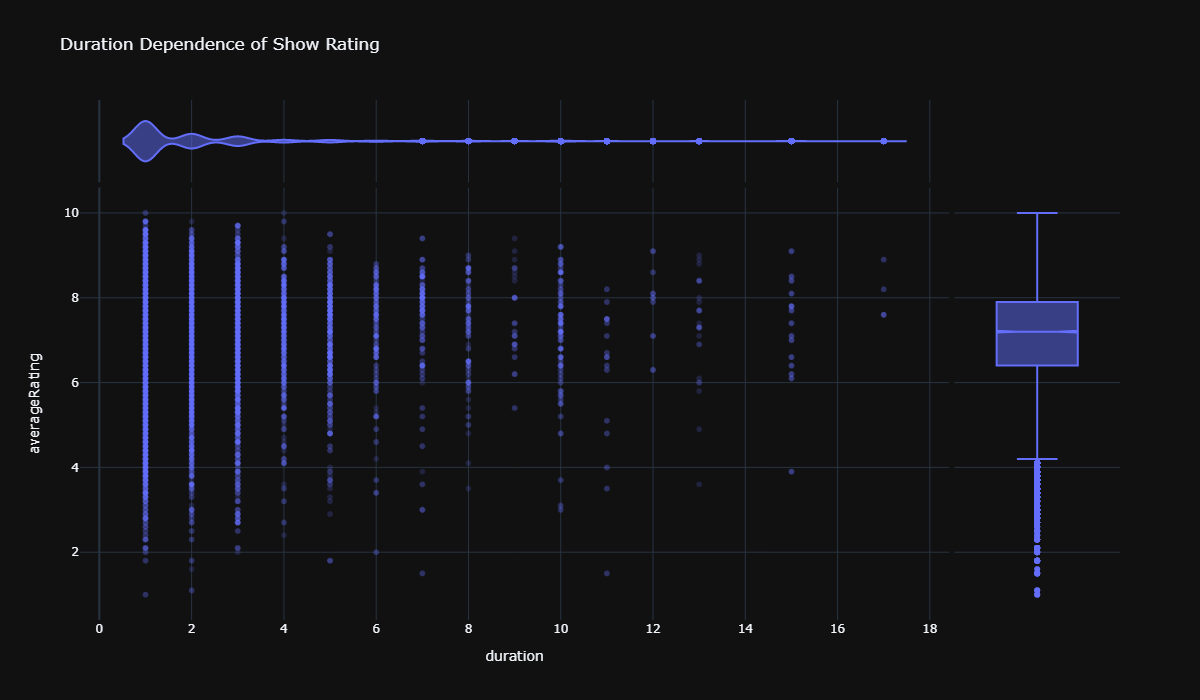

In [138]:
# I have to convert this ipynb file to pdf format. So i have to run this cell to convert the plotly interactive plot into image format

fig = px.scatter(duration_rating_T, x='duration', y='averageRating', marginal_x = 'violin',marginal_y = 'box',opacity = 0.2, template='plotly_dark', width = 1400, height= 800, title = 'Duration Dependence of Show Rating')

from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) 
Image(image_bytes)

So, for both, the shows and movies, for larger duration or greater amount of seasons, the quality is maintained, its the short type contents which has a high variation graph. They need to screen more for the short type contents.

# <b>Rating Dependence on Directors

In [113]:
df_director_cast = df_raw_rating[['show_id','cast','director','averageRating']]
df_director_cast.head()

show_id                                               cast         director  \
0      s1                                                NaN  Kirsten Johnson   
1      s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...              NaN   
2      s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...              NaN   
3      s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...              NaN   
4      s2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...              NaN   

   averageRating  
0            7.4  
1            7.9  
2            7.3  
3            7.3  
4            6.6

In [114]:
df_director_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28992 entries, 0 to 28991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        28992 non-null  object 
 1   cast           27023 non-null  object 
 2   director       20440 non-null  object 
 3   averageRating  27180 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [115]:
df_director_cast.dropna(inplace=True)

c:\Users\writa\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df_director_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18316 entries, 5 to 28991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        18316 non-null  object 
 1   cast           18316 non-null  object 
 2   director       18316 non-null  object 
 3   averageRating  18316 non-null  float64
dtypes: float64(1), object(3)
memory usage: 715.5+ KB


In [117]:
director_lst = df_director_cast['director'].apply(lambda x: str(x).split(", ")).tolist()

In [118]:
director_melted = pd.DataFrame(director_lst, index=df_director_cast['show_id'])

In [119]:
director_melted.head()

0     1     2     3     4     5     6     7     8   \
show_id                                                                    
s3       Julien Leclercq  None  None  None  None  None  None  None  None   
s3       Julien Leclercq  None  None  None  None  None  None  None  None   
s6         Mike Flanagan  None  None  None  None  None  None  None  None   
s6         Mike Flanagan  None  None  None  None  None  None  None  None   
s6         Mike Flanagan  None  None  None  None  None  None  None  None   

           9     10    11    12  
show_id                          
s3       None  None  None  None  
s3       None  None  None  None  
s6       None  None  None  None  
s6       None  None  None  None  
s6       None  None  None  None

In [120]:
df_director = pd.DataFrame(director_melted.stack()).reset_index()
df_director.head()

show_id  level_1                0
0      s3        0  Julien Leclercq
1      s3        0  Julien Leclercq
2      s6        0    Mike Flanagan
3      s6        0    Mike Flanagan
4      s6        0    Mike Flanagan

In [121]:
df_director.rename(columns={0:'director'}, inplace=True)
df_director.drop(['level_1'], axis=1, inplace=True)

In [270]:
df_director.head()

show_id         director
0      s3  Julien Leclercq
1      s3  Julien Leclercq
2      s6    Mike Flanagan
3      s6    Mike Flanagan
4      s6    Mike Flanagan

In [123]:
len(df_director['director'].unique()) 

3847

In [124]:
director_rating = df_director.merge(df_raw_rating[['show_id','averageRating']], on='show_id', how='inner')

In [125]:
director_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408978 entries, 0 to 408977
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   show_id        408978 non-null  object 
 1   director       408978 non-null  object 
 2   averageRating  408978 non-null  float64
dtypes: float64(1), object(2)
memory usage: 12.5+ MB


In [269]:
director_rating.head()

level_0   index show_id            director  averageRating
0        0  250122   s4618  Monique Gardenberg           10.0
1      208  249582   s4618  Monique Gardenberg           10.0
2      285  385380   s8253        Harvey Lowry           10.0
3      284  284775   s5751    Clovis Cornillac           10.0
4      283  250662   s4618  Monique Gardenberg           10.0

In [268]:
director_rating = director_rating.sort_values('averageRating', ascending=False).reset_index()
director_rating.head()

level_0   index show_id            director  averageRating
0        0  250122   s4618  Monique Gardenberg           10.0
1      208  249582   s4618  Monique Gardenberg           10.0
2      285  385380   s8253        Harvey Lowry           10.0
3      284  284775   s5751    Clovis Cornillac           10.0
4      283  250662   s4618  Monique Gardenberg           10.0

In [128]:
director_unique = director_rating.drop_duplicates(subset = 'director', keep='first')

In [130]:
dirlist_top_twenty = list(director_unique['director'][:21])
director_top_twenty = director_rating.loc[director_rating['director'].isin(dirlist_top_twenty)]

In [131]:
px.box( director_top_twenty, x='director', y='averageRating')

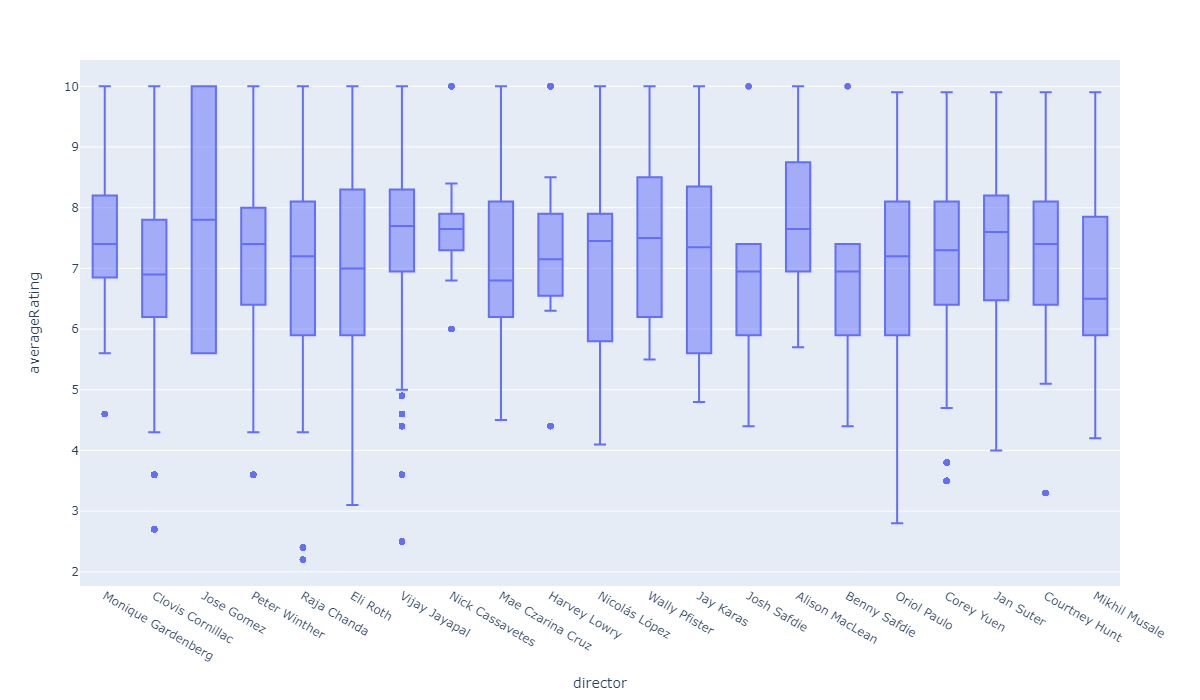

In [135]:
## As I need to convert this ipynb file to pdf that why I have to run this cell to convert the interactive plotly diagram to an image file.

fig = px.box( director_top_twenty, x='director', y='averageRating')
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

In [132]:
dirlist_below_500 = list(director_unique['director'][-100:-601:-1])
director_below_500 = director_rating.loc[director_rating['director'].isin(dirlist_below_500)]

In [136]:
px.scatter(director_below_500, x = 'director', y='averageRating')

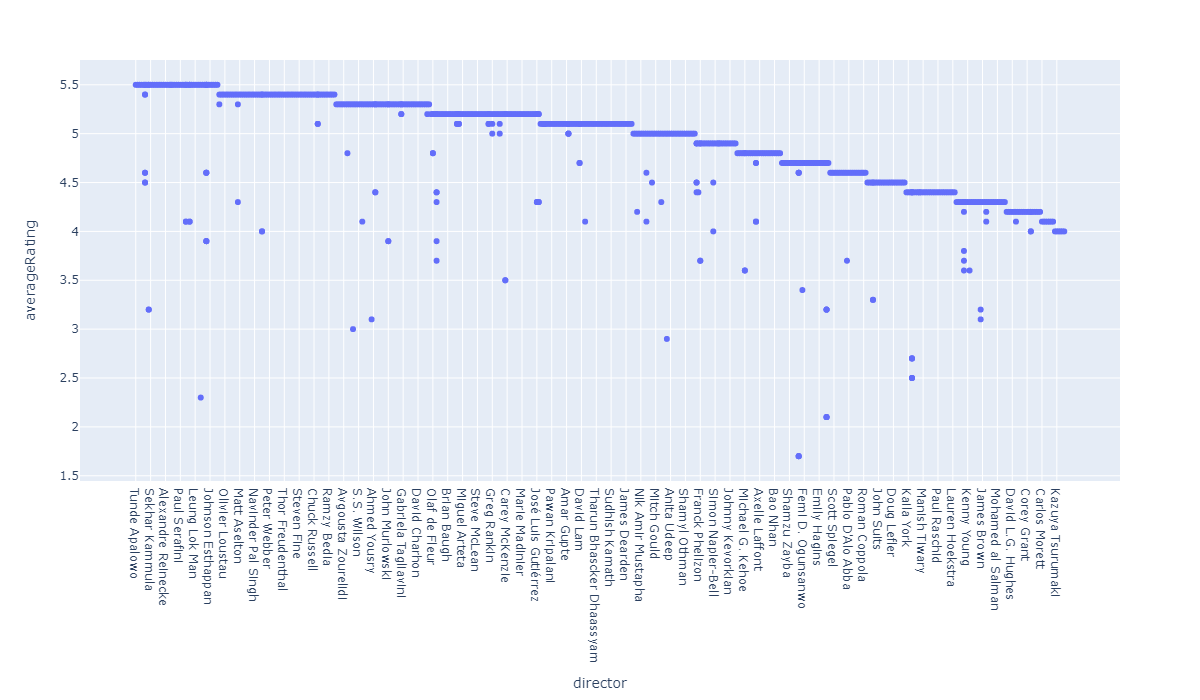

In [137]:
## As I need to convert this ipynb file to pdf that why I have to run this cell to convert the interactive plotly diagram to an image file.

fig = px.scatter(director_below_500, x = 'director', y='averageRating')
from IPython.display import Image
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

Thus , top 10 or 20 directors are having an average of 7 to 8 rating. But here a graph of the below 500 directors also included. This graph should be of a concern. 

# <b>CONCLUSION

Questions, Addressed : 
* Genre analysis and genre dependence of rating.
* Country dependency of the release rate
* Maturity rating Analysis.
* Content Release Rate ( Monthwise Release Rate)
* Duration ANalysis
* Imdb rating Genrewise
* Imdb rating Typewise
* Yearwise Quality Analysis
* Imdb rating on duration
* Rating dependence o directors.
</br>
</br>

* Genrewise, shows like cult and classics are popular then over all if we see, Adventure, Fantasy, Stand Ups or Thrillers are populars and movies like Romantic Movies, Documentaries, Thrillers, Horror movies are popular. But from the rating analysis, other genres also are doing well. As we saw on an avg pretty much every genre has a good amount of rating. So, Netflix should focus on those genres also. <br>

* As we saw mainly in US, India, UK, France or Germany to some extent, the movie release rate is pretty good. And with these countries Japan, Korea also contributes in a good amount in TV Show section. But apart from these 6 to 10 countries, there are above 127 ( in our Dataset, there are 127 unique countries recorded ) countries releasing movies but not getting that much popularity. Netflix should look for thopse locations more and more for marketing purpose.
 
* Monthwise release rate is also analysied. It has been seen that, the distribution of release rate is not uniform enough. Multiple releases in same month causes the low box office for all the releases. So, they need to release more uniformly to increase the box office profit.

* As, already discussed in short, lower duration contents have a large variation in rating from below 2 to above 7. But, longer duration contents are of pretty good quality. So they need to focus more on shorter duration contents.

* After merging the data with IMDB rating datset, we got the ratings for each contents. Then we analysed that pretty much every genre has an average rating of 7 plus. So, the less frequent genres should should get more and more focus as on an average they are also doing well.

* Yearwise quality analysis shows a clear visual that the more time passed by, the variation in rating increased. So, they need to look for good scripts more than looking for more scripts.

* Analysis of the directors show, that there are a lot of directors whose ratings are below 5. So, the team must look for quality in the directors or filter out those directors. Now of course, they need to keep the fact in mind that, new comers should be encouraged too side by side. So, the directors with less movie counts are excluded.
<p>Thus on the basis of this EDA, we get a few important inferences which can be implemented by Netflix as soon as possible to get a revenue hike.